<a href="https://colab.research.google.com/github/cnorthup81/Python/blob/master/Final_Progect_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving states_all.csv to states_all (7).csv


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NotFittedError: ignored

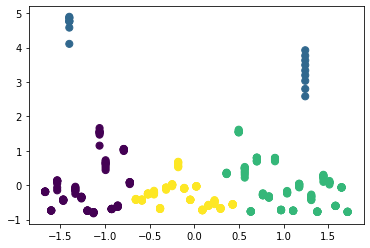

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['states_all.csv']))
# Dataset is now stored in a Pandas Dataframe
data.shape
data.head()
rows_before = data.shape[0]
data = data.dropna()
rows_after = data.shape[0]
features = ['STATE','GRADES_ALL_G']
select_df = data[features]
select_df.columns
select_df
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

# Transform the state column
select_df['STATE'] = le.fit_transform(select_df.STATE)
X = StandardScaler().fit_transform(select_df)

from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');
# transform to dataframe

import seaborn as sns
kmeans = KMeans(n_clusters=4)
predict = kmeans.predict(X)
df = pd.DataFrame(X)
df.columns = ["var1", "var2"]
df["cluster"] = predict
colors = sns.color_palette()[0:4]
df = df.sort_values("cluster")

# check plot
sns.scatterplot(df["var1"], df["var2"], hue=df["cluster"], palette=colors)
plt.show()

# define rename schema
mynames = {"0": "center_left", "1": "top_left", "2": "bot_right", "3": "center"}
df["cluster_name"] = [mynames[str(i)] for i in df.cluster]

# plot again to verify order
sns.scatterplot(df["var1"], df["var2"], hue=df["cluster_name"], 
                palette=colors)
sns.despine()
plt.show()

# save dataframe as CSV
df.to_csv("myoutput.csv")